 * Conditional probability
 * Independence
 * Multiplication rule
 * Random variables
   ** Expected Value
   ** Variance
   ** Linear combinations
 * Bernoulli distribution
 * Binomial distribution
   ** Permutations
   ** Combinations
 * Geometric distribution
 * Hypergeometric Distribution
 * Normal distribution
 * Poisson Distribution
    ** 

## Conditional probability

### Definition
A **conditional probability** of an event $A$ given $B$ describes the chances that the event $A$ occurs, having already observed an event $B$. 

The conditional probability above can be represented in mathematical notation as 

\begin{align}
    p(A|B)
\end{align}

For example, the probability of being admitted to the hospital given a patient tested positive for the novel coronavirus (COVID-19).
This could be written

\begin{align}
    p(\text{Admitted to the hospital}|\text{Positive test})
\end{align}

### Computation 

We can compute a conditional probability by

\begin{align}
    p(A|B) = \dfrac{ p( A \cap B) }{ p(B) }
\end{align}

The conditional probability is the probability that the events $A$ and $B$ occur simultaneously divided by the probability of event $B$.

There are three ways two events like $A$ and $B$ can interact to help us understand why we would compute conditional probabilities like this. 

![Venn](venn.jpeg)

In the top panel, the event $A$ only occurs if $B$ occurs.
The conditional probability computes the proportion of times $A$ occurs relative to $B$
The bottom panel shows the events $A$ and $B$ never occurring together. Since they never occur at the same time, if the event $B$ occurs the event $A$ will never occur: the conditional probability of $A$ given $B$ is zero.
Te middle panel shows a common scenario.
There is a subset of outcomes where $A$  occurs when $B$ happens. 
The conditional probability asks "how many outcomes include the event $A$ and $B$ relative to the number of times $B$ occurs?"

### Application

Below are two examples of conditional probabilities, the first more obvious than the second. 
Suppose we wanted to compute the probability of having SARS-COV-2 given a positive test.
We estimate that the probability of having SARS-COV-2 **and** a test returning positive is 0.10.
Next, suppose we estimate the probability of a test returning positive whether or not you have SARS-COV-2 is 0.50.

The conditional probability

\begin{align}
    p(\text{ SARS-COV-2 } \cap \text{ Test Pos. }) &= 0.10\\
    p(\text{ Test Pos. }) &= 0.50 \\ 
    p(\text{ SARS-COV-2 } | \text{ Test Pos. }) &= 0.10/0.50 = 20\%\\
\end{align}

--- 
### QSA: What would happen to the conditional probability if the prob. of a positive test increased. Why? Does that make intuitive sense?
---


A second example is below and a more subtle use of conditional probabilities. 
Data on COVID-19 positive rates, the probability of testing positive for SARS-COV-2, was taken from the [COVID Tracking Project](https://covidtracking.com/data). 
The COVID tracking project is hostsed by the Atlantic.
They scour as many news and iinformation sources on COVID-19 as possible to provide best possible estimates of SARS-COV-2/COVID-19 in the US.

Below is a plot of the number of positive tests divided by the total number of tests administered over time (in days) for the state of Pennsylvania. What is this proportion measuring?

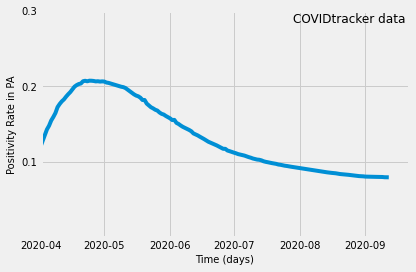

In [26]:
covidData = pd.read_csv("https://covidtracking.com/data/download/all-states-history.csv") # downlaod data from the Covidtracker
covidData["positiveRate"] = covidData.positive/covidData.totalTestResults # compute positivity rate
covidData["date"] = [pd.to_datetime(x,format="%Y%m%d") for x in covidData.date] # convert integer date to date obj.

paData = covidData[covidData.state=="PA"] # subset to PA

plt.style.use("fivethirtyeight")
fig,ax = plt.subplots() # setup a plotting space

ax.plot(paData.date, paData.positiveRate ) # plot the date by positivity rate

# Format the x and ylimits
ax.set_xlim(pd.to_datetime("2020-04-01"),ax.get_xlim()[-1])
ax.set_ylim(0,0.30)

ax.set_ylabel("Positivity Rate in PA", fontsize=10)
ax.set_xlabel("Time (days)", fontsize=10)

ax.tick_params(labelsize=10)

ax.set_yticks([0.1,0.2,0.3])

ax.text(0.99,0.99,"COVIDtracker data",fontsize=12,transform=ax.transAxes,ha='right',va='top')

# a tightlayout asks python to move around objects on the graph for the "best" possible layout
fig.set_tight_layout(True)
plt.show()

## Marginal probs from conditional probs

We can compute marginal probabilities (for example $p(A)$) by first finding a second set of events ($B_{1},B_{2},\cdots,B_{N}$) that is a **partition** of $A$. 

A **partition** of an event $A$ is a collection of sets such that their union equals $A$

if 
\begin{align}
   B_{1} \cup B_{2} \cup \cdots \cup B_{N} = A 
\end{align}

then the collection of events $B$ is a partition for $A$. 
We can compute $p(A)$ using a partition as 

\begin{align}
    p(A) &= p(A|B_{1})p(B_{1}) + p(A|B_{2})p(B_{2}) + \cdots p(A|B_{N})p(B_{N})\\
    p(A) &= \sum_{i=1}^{N} p(A|B_{i})p(B_{i})
\end{align}

---

![condAndMarg](condAndMarg.jpeg)

---

This equation can come in handy when there is more information about a set of conditional probabilities that partition an event $A$.
A common case is when you know 
 * the probability the event $B$ occurs
 * the conditional probability of $A$ when $B$ occurs
 * the conditional probability of $A$ when $B$ does not occurs

One way we could compute the probability of SAR-COV-2 could be to estimate
 * the probability the a SARS-COV-2 test returns a positive result
 * the conditional probability of SARS-COV-2 when a test returns a positive result
 * the conditional probability of SARS-COV-2 when a test returns a negative result

\begin{align}
    p(\text{SARS-COV-2}) &= p(\text{SARS-COV-2} | +) p(+) + p(\text{SARS-COV-2} | -) p(-) \\ 
                         &= p(\text{SARS-COV-2} | +) p(+) + p(\text{SARS-COV-2} | -) (1-p(+)) \\ 
\end{align}

and it may be easier to find the probability of a positive and negative test in order to compute the probability of SARS-COV-2. 
We can use another event that we have data on to compute an event we're interested in. 


## Independence and the multiplication rule

We can rearrange the conditional probability of $A$ given $B$

\begin{align}
    p(A|B) &= \frac{p(A \cap B)}{p(B)} \\ 
    p(A \cap B) &= p(A|B)p(B)
\end{align}

to compute the probability of $A$ and $B$. 
This is called the **general multiplication rule**. 

Two events are called **independent** when the occurrence of one event does not impact the probability of a second event occurring. 

\begin{align}
    p(A|B) = p(A)
\end{align}

Given that $B$ occurred does not change the probability of $A$. 
If two event are independent then computing the general multiplication rule is easier

\begin{align}
    p(A|B) &= \frac{p(A \cap B)}{p(B)} \\ 
    p(A \cap B) &= p(A|B)p(B) \\ 
    p(A \cap B) &= p(A) p(B)
\end{align}

---
### QSA: If $A$ and $B$ are disjoint (mutually exclusive), what is $p(A|B)$ ?
---

## Baye's Theorem

Baye's Theorem (BT) relates two conditional probabilities to one another:

\begin{align}
    p(A|B) = p(B|A) \times \frac{p(A)}{p(B)}
\end{align}

### A classic example of BT  

A classic example of BT relates the reliability of a test to disease **prevalence**--- the number or proportion of cases of a disease present in a population at a given time.
Suppose a test is developed so that if you have the disease of interest it returns a positive result with 0.80 probability and if you don't have the rare disease it returns a positive result with probability 0.10.  
Let's also assume the probability of having the disease is 0.001, this is a rare disease.

Given a positive test, do we have this rare disease?
Can we compute the probability of having this rare disease (RD) given a positive test (+)?

BT says
\begin{align}
    p(\text{RD} | +) =  p(+|\text{RD}) \times \frac{ p(\text{RD}) }{p(+)}
\end{align}

We know the probability the test returns a positive result if you have a disease ($p(+|\text{RD})$), and we also know the probability of having the disease ($p(\text{RD})$).

\begin{align}
    p(\text{RD} | +) &=  p(+|\text{RD}) \times \frac{ p(\text{RD}) }{p(+)}
                     &=  0.80 \times \frac{ 0.001 }{p(+)}
\end{align}

But how do we compute the probability the test returns a positive result?
Well we do know $p(+|\text{RD})$ and also $p(\text{RD})$.

From the above marginal probs section, we could compute $p(+)$ like this
\begin{align}
    p(+) = p(+|\text{RD}) p(\text{RD}) + p(+|\text{Not RD}) p(\text{Not RD})
\end{align}

The first three terms are given to us

\begin{align}
    p(+) = 0.80 \times 0.001 + 0.10 \times p(\text{Not RD})
\end{align}

and we can compute the fourth term $p(\text{Not RD}) = 1 - p(\text{ RD}) = 0.999$.
So then the probability of a positive test is 

\begin{align}
    p(+) = 0.80 \times 0.001 + 0.10 \times 0.999 = 0.1007
\end{align}

We can finally find out the probability of having this rare disease given a positive test

\begin{align}
    p(\text{RD} | +) &=  p(+|\text{RD}) \times \frac{ p(\text{RD}) }{p(+)}
                     &=  0.80 \times \frac{ 0.001 }{0.1007} = 0.008 = 0.8\%
\end{align}

Well whats going on? Our test has an 80% of returning a positive result when we have this rare disease.
And it was positive.
Why then is there only a 0.8% of actually having the disease?
Because the disease itself is rare, a positive test is no guarantee.




### BT as a way to learn from data



## Random variables